### Decompose number into sum of squares

#### Plot triangles fom sum of squares

In [17]:
using Plots
import LinearAlgebra:norm

1.4142135623730951
3.3166247903554
6.0


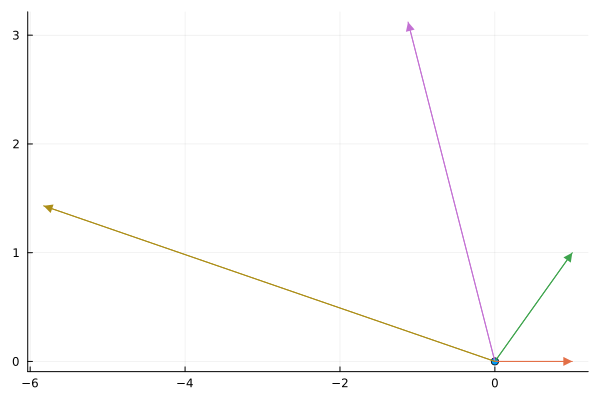

In [55]:
nums = [1,1,3,5] # 6sq = 1sq + 1sq +..5sq

plot()
scatter!([0],[0], label=nothing)
prev_vec = 0
for i in 1:length(nums)
    if i==1
        prev_vec = [nums[i],0]
    else
        θ = atan(nums[i]/norm(prev_vec))
        r = norm([nums[i], norm(prev_vec)])
        println(r)
        rot_matrix = [cos(θ) -sin(θ); sin(θ) cos(θ)]
        # rescale , rotate and update prev vector for next iteration
        prev_vec = rot_matrix * ((prev_vec/norm(prev_vec))*r)
    end
    # println(prev_vec)
    plot!([0,prev_vec[1]], [0,prev_vec[2]], label=nothing, arrow=(:closed))
end

current()